# Proyecto 03: Medical Data Visualizer


En este proyecto, hay que visualizar y calcular datos médicos utilizando las librerias matplotlib, seaborn y pandas. (medical_examination.csv)

Las filas del conjunto de datos representan a los pacientes y las columnas representan información como las medidas del cuerpo, los resultados de varios análisis de sangre y las opciones de estilo de vida. Utilizarás el conjunto de datos para explorar la relación entre la enfermedad cardíaca, las medidas corporales, los marcadores sanguíneos y las opciones de estilo de vida.

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [127]:
# Import data
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [128]:
df.head()
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
# Add 'overweight' column
'''Para definir 'overweight' vamos a crear una columna calculando su Indice de Masa Corporal(BMI en inglés).
El BMI se calcula dividendo el peso de una persona en kilos entre la altura en metros al cuadrado.
Si el valor resultante es >25 consideramos que esa persona es obesa'''

# Tenemos el peso ya en kilos en la base de datos, pero la altura está en cm
IBM = df['weight']/((df['height']*0.01)**2)
# Lo clasificacmos en gente con y sin sobrepeso
Sobrepeso = IBM>25
# Lo pasamos a una notacion de 0 y 1
Sobrepeso= Sobrepeso.astype('int')

# Ya podemos incorporar nuestra nueva columna al dataframe
df['overweight'] = Sobrepeso
#df

In [130]:
'''Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0.
If the value is more than 1, make the value 1.'''

df['cholesterol']= np.where(df['cholesterol']>1, 1, 0)
df['gluc']= np.where(df['gluc']>1, 1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [131]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    vindependientes = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=vindependientes,
                 var_name='Variable', value_name='Valor')
    
    

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.DataFrame(df_cat.groupby(['Variable', 'Valor', 'cardio'])['Valor'].count()).rename(columns={'Valor': 'Total'}).reset_index()

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, x="Variable",col="cardio", y="Total", kind="bar", hue="Valor" )
    fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# draw_cat_plot()

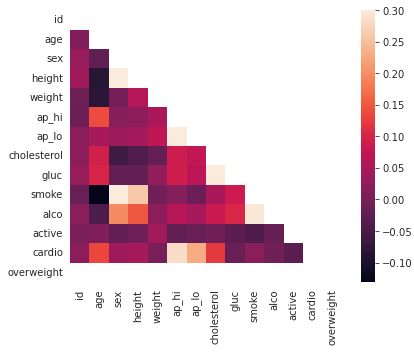

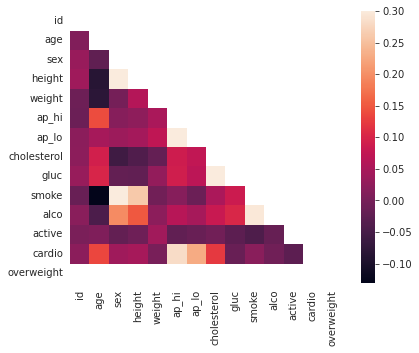

In [132]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    '''Clean the data. Filter out the following patient segments that represent incorrect data:
    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile.'''
    
    df_heat = df[(df['ap_lo']<=df['ap_hi'])
            &(df['height']>=df['height'].quantile(0.025))
            &(df['height']<=df['height'].quantile(0.975))
            &(df['weight']>=df['weight'].quantile(0.025))
            &(df['weight']>=df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    #fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(7, 5))
        ax  = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


    # Do not modify the next two lines
    fig .savefig('heatmap.png')
    return fig 

draw_heat_map()